## Reading of 3D ECMWF reanalysis data


In [1]:
import pyaerocom as pya
from warnings import filterwarnings

Init data paths for lustre


0.01690506935119629 s


In [2]:
reader = pya.io.ReadGridded('ECMWF_CAMS_REAN')
print(reader)


Pyaerocom ReadGridded
---------------------
Model ID: ECMWF_CAMS_REAN
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CAMS_REAN/renamed
Available variables: ['ang4487aer', 'ec532aer3D', 'od440aer', 'od550aer', 'od550bc', 'od550dust', 'od550oa', 'od550so4', 'od550ss', 'od865aer']
Available years: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 9999]
Available time resolutions ['daily', 'monthly']


In [3]:
filterwarnings('ignore')
data = reader.read_var('ec532aer3D', ts_type='daily', start=2010, stop=2011)
data.grid

<iris 'Cube' of Aerosol optical depth at 550 nm / (1) (time: 366; model_level_number: 60; latitude: 30; longitude: 59)>

#### Print filename

In [4]:
data.suppl_info['from_files'][0]

'/lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CAMS_REAN/renamed/ECMWF_CAMS_REAN.daily.ec532aer3D.2010.nc'

#### Check coordinate dimensions (and order)

In [5]:
data.coord_names

['time', 'model_level_number', 'latitude', 'longitude']

#### Look into model levels

In [6]:
data.model_level_number

DimCoord(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int32), standard_name=None, units=Unit('1'), long_name='model_level_number', var_name='level')

**NOTE**: the conversion coefficients a(n) and b(n) are missing but can be found here:

https://www.ecmwf.int/en/forecasts/documentation-and-support/60-model-levels

It would be preferable, to have them in the NetCDF files, so that we can convert directly into altitude without requiring to read another file that contains these coefficients.

### Extract and plot one extinction profile

In [7]:
import pandas as pd
import numpy as np
profile_values = data[30,:, 10, 10].grid.data
levels = np.arange(len(profile_values))[::-1]

#### Invert profile and convert to unit Mm-1 (assuming that it is in m-1) and create pandas Series object

In [8]:
s = pd.Series(levels,profile_values[::-1]*10**6)

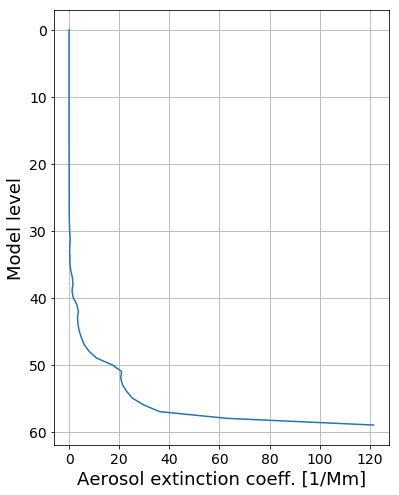

In [9]:
ax = s.plot(figsize=(6, 8))
ax.set_xlabel('Aerosol extinction coeff. [1/Mm]')
ax.set_ylabel('Model level')
ax.invert_yaxis()
ax.grid()

### Plot surface extinction map of first day

In [10]:
data_surf = data[:,-1, :,:]

In [11]:
data_surf

pyaerocom.GriddedData
Grid data: <iris 'Cube' of Aerosol optical depth at 550 nm / (1) (time: 366; latitude: 30; longitude: 59)>

In [12]:
data_surf[0].grid.data

masked_array(
  data=[[2.10175696e-05, 2.07405670e-05, 2.88082667e-05, ...,
         3.56034858e-05, 3.72741576e-05, 3.87933435e-05],
        [1.68019368e-05, 1.93642105e-05, 4.55193120e-05, ...,
         3.50105272e-05, 3.55775169e-05, 3.80359146e-05],
        [1.84726085e-05, 3.61921163e-05, 6.07587812e-05, ...,
         2.94185380e-05, 3.06217679e-05, 3.06477368e-05],
        ...,
        [3.51187314e-05, 3.53178269e-05, 4.00009016e-05, ...,
         9.36528357e-05, 9.56740888e-05, 6.45675665e-05],
        [3.36687961e-05, 3.58025814e-05, 3.94295838e-05, ...,
         1.20574022e-04, 1.11727253e-04, 9.51547090e-05],
        [3.07645973e-05, 3.31667289e-05, 3.53437959e-05, ...,
         1.45205610e-04, 1.36203027e-04, 1.27724151e-04]],
  mask=False,
  fill_value=1e+20)

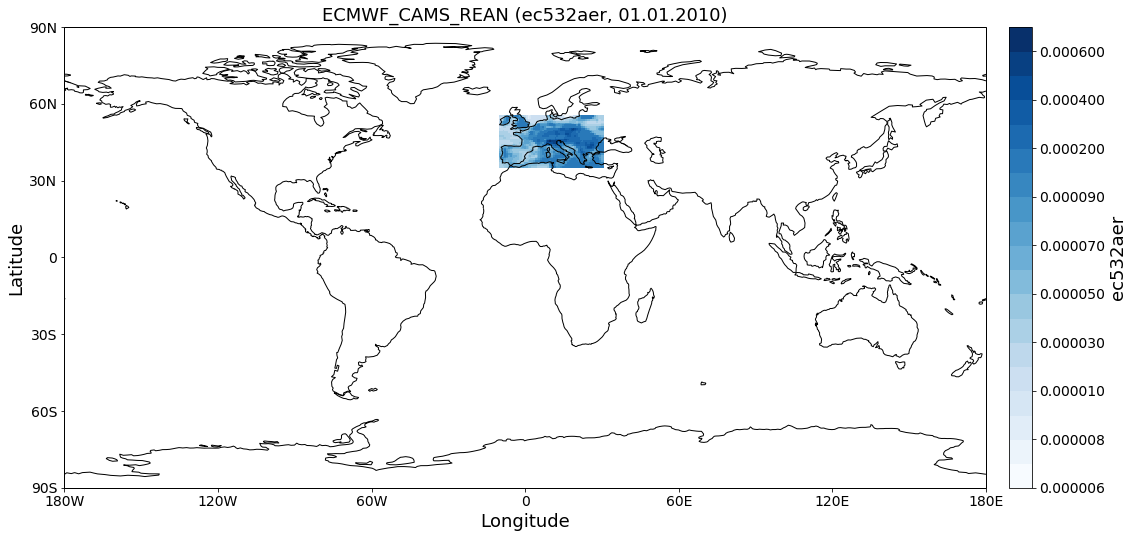

In [13]:
ax = data_surf.quickplot_map()